# ШАД. Машинное обучение

## Лабораторная работа 2. Основы статистики.

**Правила:**

* Выполненную работу нужно отправить в соответствующее задание в личном кабинете
* Дедлайн **25.09.2022 в 23:59**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Теоретическую часть можно оформить в ноутбуке или же прислать в задание фотографии
* Если вы прикрепляете фотографии к ноутбуку, убедитесь, что они "вшиты" туда, а не ссылаются на локальный путь
* Решения, размещенные на каких-либо интернет-ресурсах не принимаются. Публикация решения может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него.
* За задание можно получить до **? баллов**.

### Задача Т1 (4 балла)

Ученые задались вопросом, какую максимальную длину хвоста может иметь обычный московский кот. Для этого они в разных частях города отловили $n$ котов и измерили длину их хвоста. Ученые сделали предположение, что полученные измерения являются выборкой $X_1,\ldots,X_n$ из распределения $U(0,\theta)$. Проверьте на несмещенность, состоятельность и сильную состоятельность следующие оценки параметра $\theta$:

$2\overline{X}$, $X_{(n)}$, $(n+1)X_{(1)}$

Подсказки:

* Распределение порядковых статистик проще выводить через функцию распределения
* Для проверки состоятельности может быть нужно воспользоваться определением сходимости по вероятности

#### Решение: 

#### 1. $\theta_n = 2\overline{X}$

$\mathsf{E}_{\theta} \theta_n = \mathsf{E}_{\theta} 2\overline{X} = 2\mathsf{E}_{\theta} \overline{X} = 2\mathsf{E}_{\theta}X_1 = 2\dfrac{\theta}{2} = \theta$, т.о. оценка несмещенная.

Далее, по ЗБЧ $\overline{X}$ сходится к $\dfrac{\theta}{2}$ почти наверное, а тогда $2\overline{X}$ сходится к $\theta$ почти наверное, т.е оценка сильно состоятельная, а следовательно и просто состоятельная.

#### 2. $\theta_n = X_{(n)}$

Используя определение максимума нетрудно понять,что для произвольного вещественного $t$ выполнено следующее свойство: $X_{(n)}<t$ тогда и только тогда, когда все $X_i<t, ~1\le i\le n$. А тогда легко найти плотность распределения $p_n(t)$ случайной величины $X_{(n)}$:
$$p_n(t) = \begin{cases}
\dfrac{nt^{n-1}}{\theta^n},~t\in[0,\theta]\\
0,~иначе 
\end{cases}$$

$\mathsf{E}_{\theta} \theta_n = \int\limits_{-\infty}^{\infty} tp_n(t)dt = \int\limits_0^{\theta} \dfrac{nt^n}{\theta^n}dt = \dfrac{n\theta}{n+1}$ --- т.о. оценка смещенная, со смещением $\dfrac{-1}{n+1}$.

Далее, покажем что оценка состоятельна. По определению оценка состоятельна, если для всякого положительного малого $\varepsilon\le\theta$ (в нашем случае при $\varepsilon>\theta$ автоматически нулевая вероятность) имеет место сходимость $P(|\theta_n - \theta|\ge \varepsilon)\to 0$ при $n\to +\infty$. Так как $X_{(n)}\le \theta$ имеем $P(|X_{(n)} - \theta|\ge \varepsilon) = P(\theta - X_{(n)}\ge \varepsilon)=P(X_{(n)}\le \theta-\varepsilon)=\left(\dfrac{\theta-\varepsilon}{\theta}\right)^n\to0$ при $n\to+\infty$ т.к. $\left|\dfrac{\theta-\varepsilon}{\theta}\right|<1$.

Для каждого фиксированного $\omega\in\Omega$ последовательность $\{X_{(n)}(\omega)\}_n$ монотонно возрастающая ввиду свойств максимума. И мы знаем, что она ограничена сверху $\theta$. А тогда она имеет предел $H(\omega)$. Но так как $X_{(n)}$ по вероятности сходится к $\theta$, то $H = \theta$ почти навеврное, а это и означает, что оценка $\theta_n$ сильно состоятельна.

#### 2. $\theta_n = (n+1)X_{(1)}$

Найдем функцию распеделения $X_{(1)}$.

Пусть $t\in[0,\theta]$, тогда $F_n(t)=P(X_{(1)}<t)=1-P(X_{(1)}\ge t)=1-P^n(X_1\ge t)=1-(1-F_1(t))^n=1-(1-\frac{t}{\theta})^n$

Плотность распределения для $t\in[0,\theta]$: 
$$p_n(t)=\dfrac{n(1-\frac{t}{\theta})^{n-1}}{\theta}$$

$\mathsf{E}_{\theta} \theta_n = (n+1)\int\limits_{-\infty}^{\infty} tp_n(t)dt = -(n+1)n\int\limits_0^{\theta} t(1-\frac{t}{\theta})^{n-1}d(-\frac{t}{\theta}) = (n+1)\int\limits_0^{\theta} (1-\frac{t}{\theta})^n dt = (n+1)\dfrac{\theta}{n + 1} = \theta$ --- т.о. оценка несмещенная.

Покажем, что эта оценка не состоятельная, тогда автоматически и не сильно состоятельная. Действительно, рассмотрим $0<\varepsilon<<\theta$, тогда $P(|\theta_n-\theta|\ge\varepsilon)\ge P(\theta_n - \theta \ge\varepsilon) = P(\theta_n\ge\theta+\varepsilon)=P(X_{(1)}\ge \dfrac{\theta+\varepsilon}{n+1})=P^n(X_1\ge\dfrac{\theta+\varepsilon}{n+1})=\left(1 - \dfrac{\theta+\varepsilon}{\theta(n+1)}\right)^n$
 
 Вспоминая о втором замечательном пределе, находим $\left(1 - \dfrac{\theta+\varepsilon}{\theta(n+1)}\right)^n=\left(1 - \dfrac{\theta+\varepsilon}{\theta(n+1)}\right)^{-\left(\dfrac{\theta(n+1)}{\theta+\varepsilon}\right) \left(-\dfrac{n(\theta+\varepsilon)}{\theta(n+1)}\right)}\to e^{-\dfrac{\theta+\varepsilon}{\theta}}\ne 0$

### Задача Т2 (2 балла)

1963 году на одном из самолетов модели Boeing 720 были проведены измерения времени между поломками системы кондиционирования (в часах):
        $$487, 18, 100, 7, 98, 5, 85, 91, 43, 230, 3, 130$$
        Данные хорошо описываются экспоненциальным распределением с параметром $\theta>0$, и на занятиях в качестве оценки среднего времени до поломки использовалась статистика $\overline{X}$. Студент Вася на семинаре думал о логарифмах, поэтому записал себе ''$\overline{X}\ln \overline{X}$''.
        Определите, для какой величины $\tau(\theta)$ статистика $\overline{X}\ln \overline{X}$ является асимптотически нормальной оценкой. Вычислите ее асимптотическую дисперсию.

#### Решение: 

Рассмотрим функцию $h(t)=t\ln t$. Ясно, что эта функция непрерывно дифференцируема на $(0,+\infty)$ и $h'(t)=\ln t + 1$. Так как $\overline{X}$ --- АНО для $\frac{1}{\theta}$, то $h(\overline{X})$ --- АНО для $h(\frac{1}{\theta}) = \dfrac{\ln\frac{1}{\theta}}{\theta}$

Вычислим новую асимптотическую дисперсию. $\sigma_{\tau}^2=\sigma_{\frac{1}{\theta}}\cdot (1+\ln\frac{1}{\theta})^2=\dfrac{(1+\ln\frac{1}{\theta})^2}{\theta^2}$

### Задача Т3 (3 балла)

Во время лекции мы рассматривали различные оценки дисперсии на основе $S^2$. Изучим эти оценки подробнее с учётом введения понятия о сравнении оценок.

Напомним определение MSE:

$$ \text{MSE}_{\widehat{\theta}}(\theta) = E (\widehat{\theta} - \theta)^2 $$

Для MSE справедливо так называемое bias-variance разложение, которое может помочь легче вычислить MSE.

$$\text{MSE}_{\widehat{\theta}}(\theta) = D_\theta(\widehat{\theta}) + (E_\theta(\widehat{\theta}) - \theta)^2  $$

Пусть теперь $X_1, \dots, X_n$ &mdash; выборка из распределения $\mathcal{N}(0, \sigma^2)$. Рассмотрим класс оценок параметра $\sigma^2$:

$$ \mathcal{K} = \{ \frac{1}{c} \sum\limits_{i=1}^n (X_i - \overline{X}) ^ 2,\ c \in \mathbb{R} \} $$

Фактически это набор оценок $S^2$, умноженных на константу.

1) Какое $c$ соответствует несмещённой оценке? (было на семинаре, запишите ответ)

2) При каком $c$ MSE оценки будет минимально?

3) Есть ли $c$, которое соответствует оценке максимального правдоподобия?

Подсказки:

* $\frac{nS^2}{\sigma^2} \sim \chi^2_{n-1}$ (распределение <a href=https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D1%85%D0%B8-%D0%BA%D0%B2%D0%B0%D0%B4%D1%80%D0%B0%D1%82>хи-квадрат</a>)

#### Решение: 

1) $c=n-1$

2) Используя подсказку, находим $$D_{\sigma^2}\left(\dfrac{nS^2}{c}\right) = D_{\sigma^2}\left(\dfrac{\sigma^2}{c}\dfrac{nS^2}{\sigma^2}\right)=\dfrac{\sigma^4}{c^2}D_{\sigma^2}\left(\dfrac{nS^2}{\sigma^2}\right)=\dfrac{2(n-1)\sigma^4}{c^2}$$ и $$E_{\sigma^2}\left(\dfrac{nS^2}{c}\right)=\dfrac{\sigma^2(n-1)}{c}$$

После этого $\text{MSE}(\sigma^2)=\dfrac{2(n-1)\sigma^4}{c^2} + \left(\dfrac{\sigma^2(n-1)}{c} - \sigma^2\right)^2=\sigma^4\left(\dfrac{2(n-1) + (n-1)^2}{c^2} - \dfrac{2(n-1)}{c} + 1\right)$

Получили квадратный трехчлен на $\frac{1}{c}$, т.к. коэффициент при квадрате положителен, то минимум достигается в вершине параболы 

$$\dfrac{1}{c_0}=\dfrac{2(n-1)}{2(2(n-1) + (n-1)^2)}=\dfrac{n-1}{n^2-1}=\dfrac{1}{n+1}$$ т.о. оптимальное $c_0=n+1$

3) $l_X(\sigma)=-\dfrac{n\overline{X^2}}{2\sigma^2}-n\ln (\sigma\sqrt{2\pi})$. Приравнивая к нулю первую производную, находим ОМП $\widehat{\sigma^2}=\overline{X^2}$, в то время как $\dfrac{nS^2}{c}=\dfrac{n\overline{X^2}}{c}-\dfrac{n\left(\overline{X}\right)^2}{c}$

Попытаемся выразить константу $\dfrac{nS^2}{c}=\overline{X^2}~\Leftrightarrow~c=\dfrac{nS^2}{\overline{X^2}}=n-\dfrac{n\left(\overline{X}\right)^2}{\overline{X^2}}$. Т.о. получаем некую статистику, зависящую от элементов выборки. Т.о. нужную константу найти нельзя.

-----

### Задача 1 (3 балла)
Пусть $\widehat{\theta}$ &mdash; оценка параметра $\theta$ и $MSE_{\widehat{\theta}} (\theta) = \mathsf{E}_{\theta} \left(\widehat{\theta} - \theta\right)^2$ &mdash; среднеквадратичная ошибка оценки $\widehat{\theta}$. Тогда справедливо bias-variance разложение:
$$MSE_{\widehat{\theta}} (\theta) = \textrm{bias}_{\widehat{\theta}}^2(\theta) + \textrm{var}_{\widehat{\theta}} (\theta); \\
\begin{align*}
\textrm{bias}_{\widehat{\theta}} (\theta) & = \mathsf{E}_{\theta} \widehat{\theta} - \theta; \\
\textrm{var}_{\widehat{\theta}} (\theta) & = \mathsf{D}_{\theta} \widehat{\theta}.
\end{align*}$$

Пусть $X = (X_1, \dots, X_n)$ &mdash; выборка из распределения $U[0, \theta]$. Рассмотрим класс оценок $\mathcal{K} = \left\{cX_{(n)}, c\in\mathbb{R}\right\}$. Выпишите формулы bias-variance разложения для таких оценок.

Обозначим $\theta_c=cX_{(n)}$. Тогда $\textrm{bias}_{\theta_c} (\theta) = \mathsf{E}_{\theta} \theta_c - \theta = c\mathsf{E}_{\theta} X_{(n)} - \theta = \frac{cn\theta}{n+1} - \theta=(\frac{cn}{n+1}-1)\theta=\frac{c(n-1)-1}{n+1}\theta$

$\textrm{var}_{\widehat{\theta}} (\theta) = c^2\left(\dfrac{n\theta^2}{n+2}-\dfrac{n^2\theta^2}{(n+1)^2}\right)=\theta^2\dfrac{c^2n}{(n+1)^2(n+2)}$

**Ответ:** 
$$MSE_{\widehat{\theta}} (\theta) = \frac{(c(n-1)-1)^2}{(n+1)^2}\theta^2 + \theta^2\dfrac{c^2n}{(n+1)^2(n+2)}$$

Заметим, что каждая компонента bias-variance разложения пропорциональна $\theta^2$. Это означает, достаточно рассмотреть поведение компонент при изменении $c$ только для одного значения $\theta$.

Постройте график зависимости компонент bias-variance разложения от $c$ для $n=5$ и $\theta=1$. С помощью функций `plt.xlim` и `plt.ylim` настройте видимую область графика так, чтобы четко была отображена информативная часть графика (по оси *x* примерно от `0.9` до `1.4`). Не забудьте добавить сетку и легенду, а также подписать оси.

На графике проведите вертикальные линии с координатами $c$, соответствующими минимуму функции риска, несмещенной оценке и ОМП.

Сделайте выводы. Какое значение $c$ дает минимум функции риска? Каково поведение компонент разложения? Как соотносятся полученные оценки?

**Решение:**

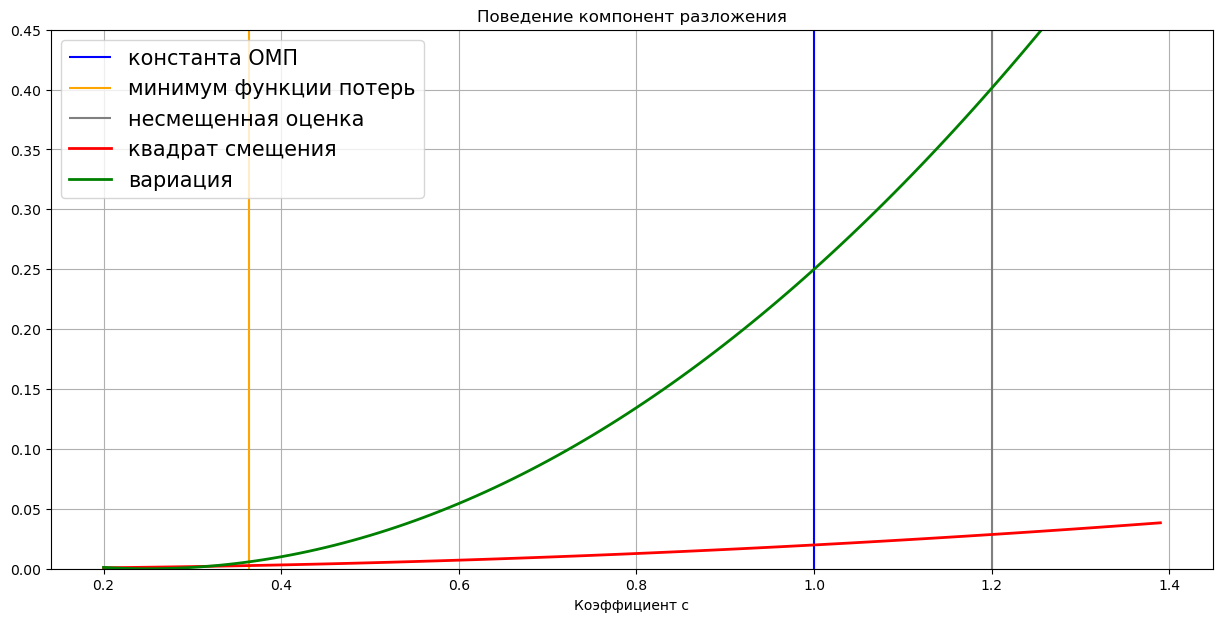

In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15, 7))

beta = 56 / 154
n = 5

plt.vlines(1, -1, 1, color='b', label='константа ОМП')
plt.vlines(beta, -1, 1, color='orange', label='минимум функции потерь')
plt.vlines(6 / 5, -1, 1, color='gray', label='несмещенная оценка')

time = np.arange(0.2, 1.4, 0.01)

plt.plot(time, time * time * n / (((n + 1) ** 2) * (n + 2)), color='red', lw=2, label='квадрат смещения')
plt.plot(time, (time * (n - 1) - 1) ** 2 / (n + 1) ** 2, color='green', lw=2, label='вариация')

plt.title('Поведение компонент разложения')
plt.xlabel('Коэффициент c')
plt.legend(fontsize=15)
plt.ylim(0, 0.45)
plt.grid()

**Вывод:**
Так как смещение оценки обратно пропорционально размеру выборки, то с учетом возведения в квадрат, больший вес имеет слагаемое с дисперсией оценки. Видно, что с ростом $c$ растет и вариация и смещение. Также видно, что (если я правильно посчитал) ОМП не является оптимальной с точки зрения минимизации потерь.

### Задача 2 (6 баллов)

**0. Постановка задачи**

На высоте 1 метр от точки $\theta$ находится источник $\gamma$-излучения, 
причем направления траекторий $\gamma$-квантов случайны, т.е. равномерно распределены по полуокружности. Тогда $X_i, i=1,...,n$ — зарегистрированные координаты точек пересечения $\gamma$-квантов с поверхностью детекторной плоскости — образуют выборку.

Вычислите функцию распределения и плотность величин из этой выборки

**Решение:**

Внимательный взгляд на прямоугольные треугольники и знание определения тангенса угла приводят к формулам для функции распределения:

$$t\le\theta~\Rightarrow P(X_1<t)=\dfrac{\frac{\pi}{2}-\arctan{\frac{1}{\theta-t}}}{\pi}$$

$$t\ge\theta~\Rightarrow P(X_1<t)=\dfrac{\frac{\pi}{2}+\arctan{\frac{1}{t-\theta}}}{\pi}$$

После дифференцирования получаем общую формулу плотности распределения:

$$p(t)=\dfrac{1}{\pi(1+(t-\theta)^2)}$$

**1. Свойства распределения**

У вас должно получиться стандартное распределение Коши с параметром сдвига $\theta$.

На отрезке $[-7, 7]$ постройте плотность стандартного нормального распределения и стандартного распределения Коши. Не забудьте добавить легенду. Сравните распределения между собой.

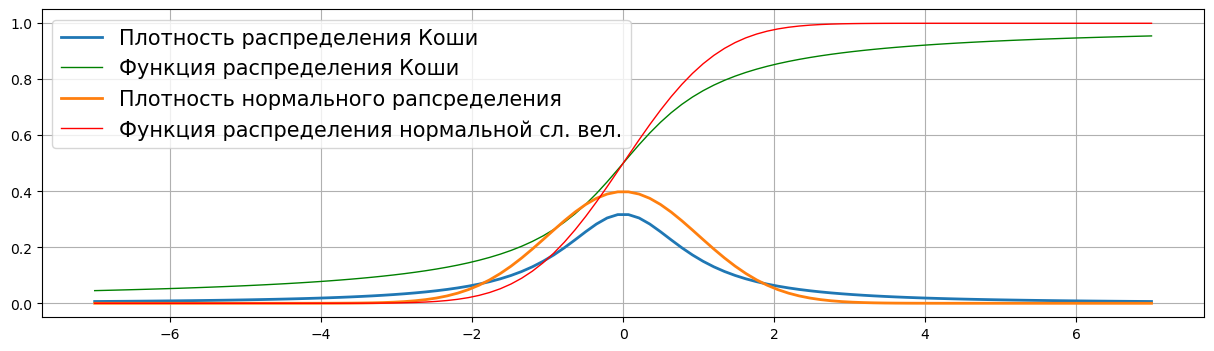

In [2]:
from scipy.stats import cauchy
from scipy.stats import norm
fig, ax = plt.subplots(1, 1, figsize=(15, 4))

x = np.linspace(-7, 7, 100)
ax.plot(x, cauchy.pdf(x), lw=2, alpha=1, label='Плотность распределения Коши')
ax.plot(x, cauchy.cdf(x),
       'g-', lw=1, alpha=1, label='Функция распределения Коши')

ax.plot(x, norm.pdf(x), lw=2, alpha=1,
        label='Плотность нормального рапсределения')
ax.plot(x, norm.cdf(x),
       'r-', lw=1, alpha=1,
        label='Функция распределения нормальной сл. вел.')
plt.legend(fontsize=15)
plt.grid()

Посмотрим на плотности чуть дальше от нуля:

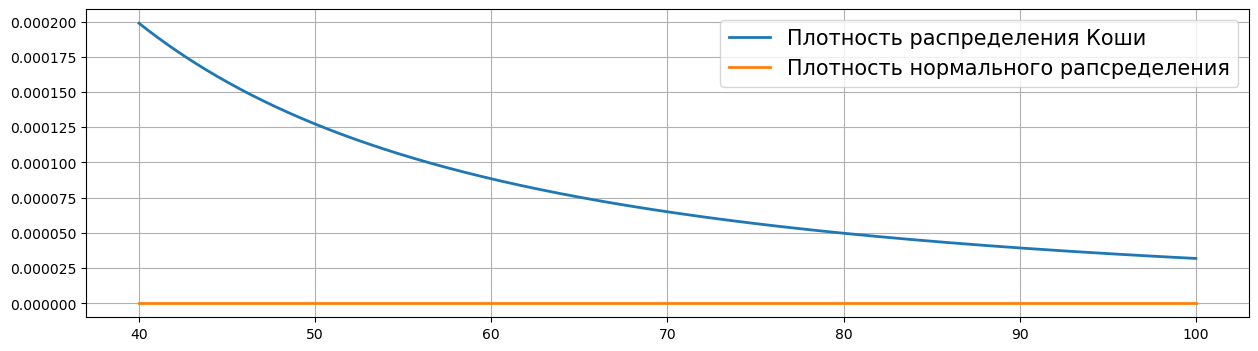

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))

x = np.linspace(40, 100, 1000)
ax.plot(x, cauchy.pdf(x), lw=2, alpha=1, label='Плотность распределения Коши')

ax.plot(x, norm.pdf(x), lw=2, alpha=1,
        label='Плотность нормального рапсределения')

plt.legend(fontsize=15)
plt.grid()

**Вывод:**
Все, как и ожидалось. Экспонента убывает гораздо быстрее, чем обратная степенная функция. Сами распределения симметричны относительно нуля.

Как известно, для распределения Коши нельзя посчитать математическое ожидание. В связи с этим не работает, например, ЗБЧ, так что оценка $\overline{X}$ не является состоятельной.

Сравните распределение $\overline{X}$ и распределение одного элемента. Для этого сгенерируйте $10^5$ выборок размера $30$, посчитайте среднее для каждой, постройте гистограмму и сравните с распределением Коши.

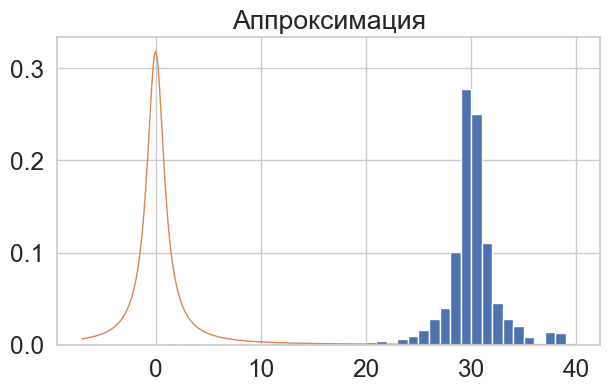

In [4]:
import scipy.stats as sps

size = 30  # размер выборок
count = 10**3  # количество выборок
means = []

for i in range(count):
    sample = sps.cauchy.rvs(size) # генерируем выборку
    means.append(sample.mean())
    
import seaborn as sns
sns.set(style='whitegrid', font_scale=1.6)

%matplotlib inline

plt.figure(figsize=(7, 4))
bins = np.arange(-7, 40, 1)
plt.hist(means, bins, density=True)
bins = np.arange(-7, 40, 0.1)
plt.plot(bins, sps.cauchy.pdf(bins), lw=1)
plt.title('Аппроксимация');

А если сместить:

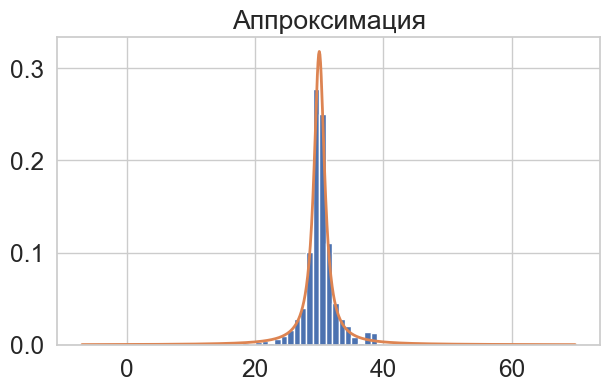

In [5]:
sns.set(style='whitegrid', font_scale=1.6)

plt.figure(figsize=(7, 4))
bins = np.arange(-7, 40, 1)
plt.hist(means, bins, density=True)
bins = np.arange(-37, 40, 0.1)
plt.plot(bins + 30, sps.cauchy.pdf(bins), lw=2)
plt.title('Аппроксимация');

А теперь 50 вместо 30:

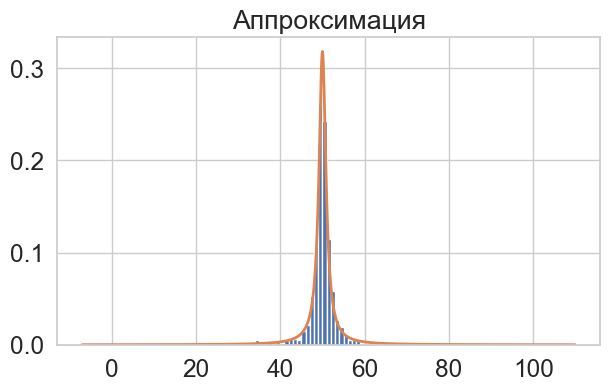

In [6]:
size = 50  # размер выборок
count = 10**3  # количество выборок
means = []

for i in range(count):
    sample = sps.cauchy.rvs(size) # генерируем выборку
    means.append(sample.mean())
    
import seaborn as sns
sns.set(style='whitegrid', font_scale=1.6)

%matplotlib inline

plt.figure(figsize=(7, 4))
bins = np.arange(-7, 60, 1)
plt.hist(means, bins, density=True)
bins = np.arange(-57, 60, 0.1)
plt.plot(bins + 50, sps.cauchy.pdf(bins), lw=2)
plt.title('Аппроксимация');

**Вывод:**
Как видно на графиках, распределение выборочного срендего $n$ случайных величин сильно похоже на распределение Коши со сдвигом $n$, по крайней мере для небольших $n$.

**2. Другие методы построения оценки**

C учётом того, что не выполнены ЗБЧ и ЦПТ, требуются другие способы оценить параметр $\theta$. Один из пройденных методов &mdash; метод максмального правдоподобия. Но в случае, когда элементов выборки больше двух, решать уравнение уже сложно (можете в этом убедиться).

Тогда может помочь теорема о выборочной медиане.

**Теорема** (о выборочной медиане) Если $\mu$ &mdash; медиана распределения, плотность $p$ непрерывна в окрестности $\mu$ и $p(\mu) > 0$, то выборочная медиана $\widehat{\mu}$ является асимптотически нормальной оценкой $\mu$ с асимтотической дисперсией $\frac{1}{4p^2(\mu)}$

$$ 
\widehat{\mu} = \begin{cases}
    X_{(k+1)} & \text{если } n = 2k + 1 \\
    \frac{X_{(k)} + X_{(k+1)}}{2} & \text{если } n = 2k \\
\end{cases} 
$$

Вычислите асимптотическую дисперсию $\widehat{\mu}$ при оценке параметра $\theta$ для распределения Коши со сдвигом.

**Решение:** 

Медиана распределения Коши со сдвигом $\theta$ равна в точности $\mu=\theta$. Плотность распределения $p(t)=\dfrac{1}{\pi}\dfrac{1}{1+(t-\theta)^2}$ непрерывна всюду и $p(\theta)=\dfrac{1}{\pi}>0$. Тогда по теореме выше найдем ассимптотическую дисперсию выборочной медианы $\sigma_{\widehat{\mu}}=\dfrac{\pi^2}{4}$

**3. Одношаговые оценки**

Метод максимального правдоподобия, тем не менее, позволяет найти оценку с лучшей асимптотической дисперсией. В данной задаче мы не можем им воспользоваться, но можем вычислить оценку максимального правдоподобия **приближённо**.

Пусть $\ell_X(\theta)$ &mdash; логарифмическая функция правдоподобия, а $\widehat{\theta}_0$ &mdash; некоторое начальное приближение. Тогда приближаться к ОМП можно с помощью метода Ньютона.

$$ \widehat{\theta}_{k+1} = \widehat{\theta}_k - \left(\ell_X''(\widehat{\theta}_k)\right)^{-1} \cdot \ell'_X(\widehat{\theta}_k) $$

Оказывается, что если взять в качестве $\widehat{\theta}_0$ любую АНО и сделать всего один шаг метода Ньютона, то есть взять $\widehat{\theta}_1$, то такая оценка будет асимптотически нормальной с такой же асимптотической дисперсией, как у ОМП. Этот факт верен при выполнении 9 условий регулярности. Такие оценки называются **одношаговыми**.

Для распределения Коши со сдвигом можно взять $\widehat{\theta_0} = \widehat{\mu}$.

Сгенерируйте выборку $X = \left(X_1, \dots, X_{1000} \right)$ из стандартного распределения Коши. Для всех $n \leqslant 1000$ по первым $n$ элементам выборки $X_1, \dots, X_n$ вычислите значения следующих оценок:
- $\overline{X}$  —  выборочное среднее;
- $\widehat{\mu}$ —  выборочная медиана;

Посчитайте также одношаговые оценки на основании этих оценок. Формально $\overline{X}$ не является АНО, но всё равно постройте. На одном графике изобразите зависимость значений этих оценок от $n$. Для каждой оценки $\widehat{\theta}_0$ соответствующая оценка $\widehat{\theta}_1$ должна быть изображена на графике пунктиром тем же цветом, что и $\widehat{\theta}_0$. 

Сравните асимптотические дисперсии для асимптотически нормальных оценок. Для этого может потребоваться дополнительная визуализация. Сделайте вывод.

In [7]:
def log_cauchy_distr(x, y):
    return np.log(1 / (np.pi * (1 + (x - y) ** 2)))

def first_deriv(x, y):
    return 2 * (x - y) / (1 + (x - y) ** 2)

def second_deriv(x, y):
    return 2 * ((x - y) ** 2 - 1) / ((1 + (x - y) ** 2) ** 2)

def draw_stat(
    means=None, means_first_iter=None, medians=None, medians_first_iter=None,
    ylim=(None, None), color_means='#FF3300', color_medians='black',
    label_means='Выборочное среднее', label_medians='Выборочная медиана',
    label_means_iter='Первое приближение по среднему', 
    label_medians_iter='Первое приближение по медиане'
):
    
    time = np.arange(size) + 1

    if not means is None:
        plt.plot(time, means, color=color_means, 
                 linewidth=1, label=label_means)
    if not medians is None:
        plt.plot(time, medians, color=color_medians, 
                 linewidth=1, label=label_medians)
    if not means_first_iter is None:
        plt.plot(time, means_first_iter, color=color_means, linestyle = '--',
                 linewidth=1, label=label_means_iter)
    if not medians_first_iter is None:
        plt.plot(time, medians_first_iter, color=color_medians, linestyle = '--',
                 linewidth=1, label=label_medians_iter)

    plt.legend(fontsize=16)
    plt.ylim(ylim) 
    plt.xlabel('Размер выборки')
    plt.title('Приближенные ОМП, индуцированные различными оценками')
    plt.grid() 

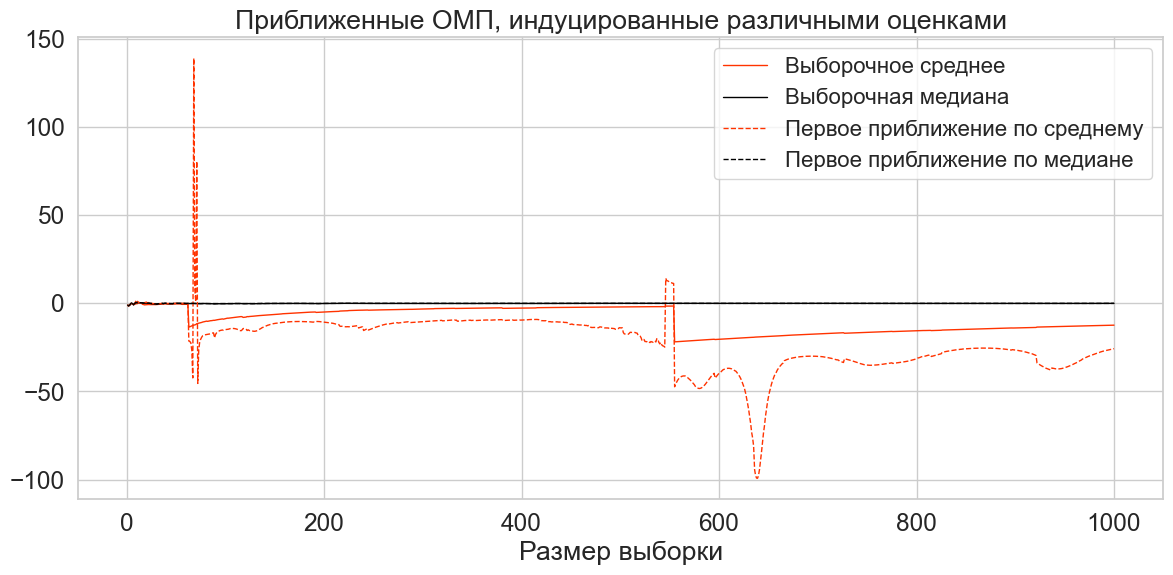

In [11]:
size = 1000
sample = sps.cauchy.rvs(size=size) # генерируем выборку
time = np.arange(len(sample)) + 1

# вычисляем оценки
means = sample.cumsum() / time
medians = []
for i in time:
    medians.append(np.median(sample[:i]))
medians = np.array(medians)

# вычисляем приближенные оценки
vec_first_deriv = np.vectorize(first_deriv)
vec_second_deriv = np.vectorize(second_deriv)

means_first_deriv, means_second_deriv = np.zeros(size), np.zeros(size)
medians_first_deriv, medians_second_deriv = np.zeros(size), np.zeros(size)

for i in time:
    means_first_deriv[i - 1] = vec_first_deriv(sample[:i], means[i - 1]).sum()
    means_second_deriv[i - 1] = vec_second_deriv(sample[:i], means[i - 1]).sum()
    medians_first_deriv[i - 1] = vec_first_deriv(sample[:i], medians[i - 1]).sum()
    medians_second_deriv[i - 1] = vec_second_deriv(sample[:i], medians[i - 1]).sum()

means_first_iter = means - (means_first_deriv / means_second_deriv)
medians_first_iter = medians - (medians_first_deriv / medians_second_deriv)

plt.figure(figsize=(14,6))
draw_stat(means, means_first_iter, medians, medians_first_iter)
plt.grid()

Посмотрим поближе:

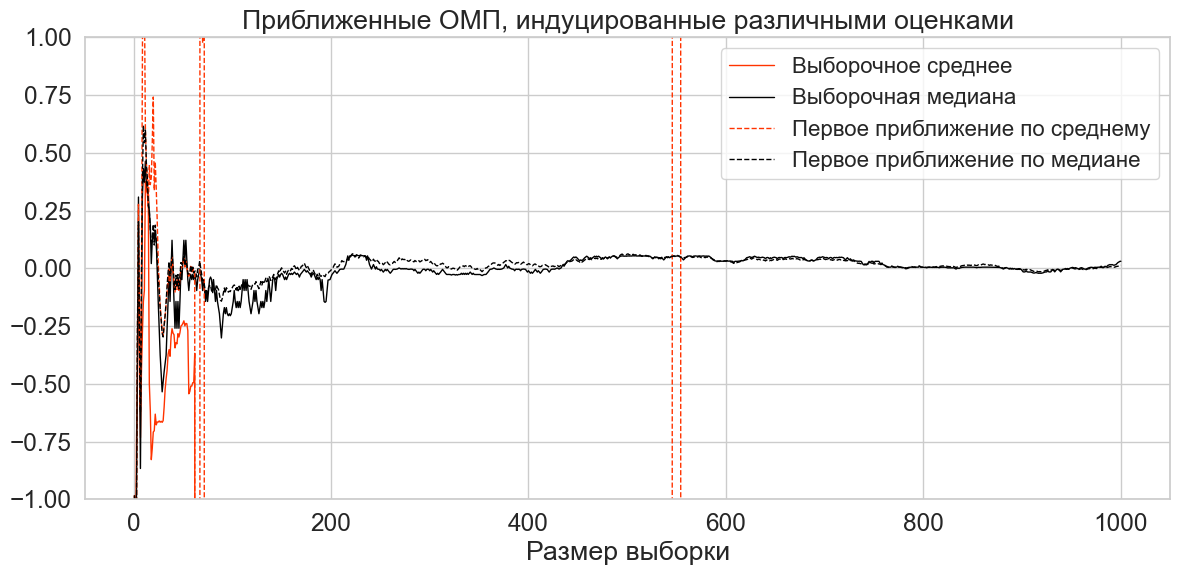

In [12]:
plt.figure(figsize=(14,6))
draw_stat(means, means_first_iter, medians, medians_first_iter, ylim=(-1,1))
plt.grid()

Теперь посмотрим на скорость сходимости. Красным на графике показаны границы ассимптотической дисперсии для выборочной медианы, деленной на $\sqrt{n}$:

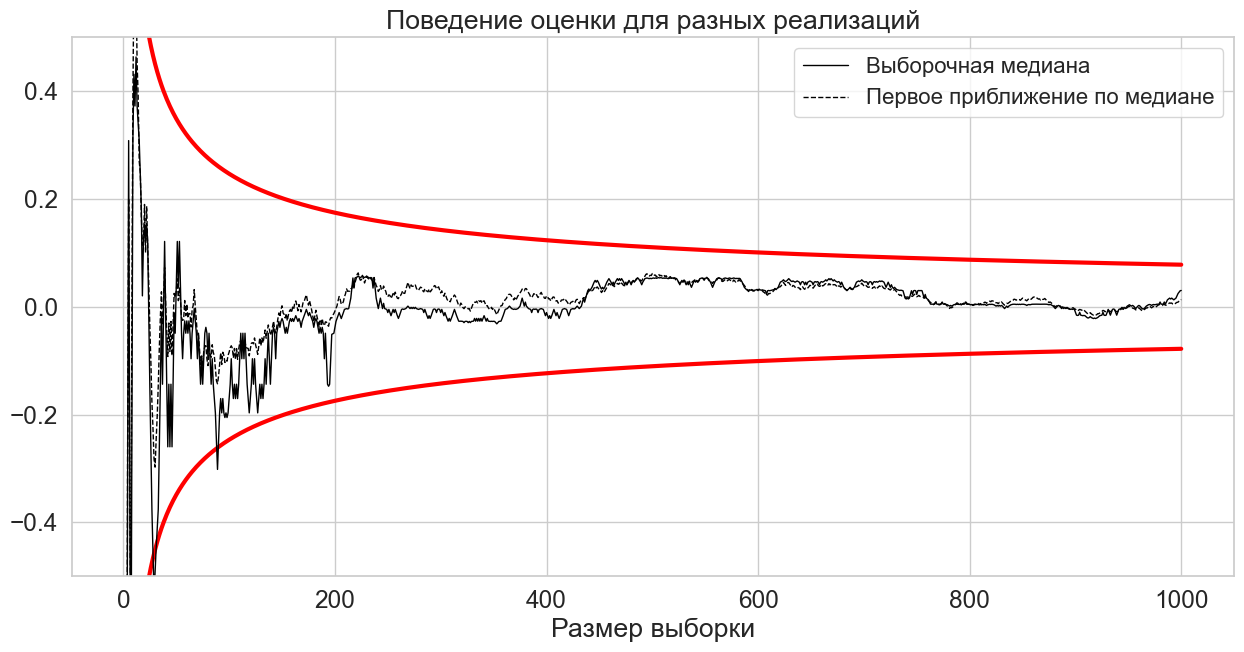

In [13]:
plt.figure(figsize=(15, 7))

plt.plot(time, ((np.pi ** 2) / 4) / np.sqrt(time), color='red', lw=3)
plt.plot(time, -((np.pi ** 2) / 4) / np.sqrt(time), color='red', lw=3)

draw_stat(medians=medians, medians_first_iter=medians_first_iter, ylim=(-0.5, 0.5))

plt.title('Поведение оценки для разных реализаций')
plt.xlabel('Размер выборки')
plt.grid()

**Вывод:**
Как и ожидалось, выборочное среднее ничего не приблежает. Первое приближение к ОМП по выборочному среднему ведет себя непредсказуемо. Зачастую есть выбросы порядка 1000. Выборочная медиана, напротив, приближается к 0 с ростом выборки. Первое приближение к ОМП по выборочной медиане, в целом, имеет меньшее отклонение от истинного параметра.